# Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide.  Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

## Data Dictionary

*   Age: age of the patient [years]


*   Sex: sex of the patient [M: Male, F: Female]


*   ChestPainType: chest pain type [TA: Typical Angina, ATA:Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]


*   RestingBP: resting blood pressure [mm Hg]


*   Cholesterol: serum cholesterol [mm/dl]


*   FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]


*   RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]


*   MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]


*   ExerciseAngina: exercise-induced angina [Y: Yes, N: No]


*   Oldpeak: oldpeak = ST [Numeric value measured in depression]


*   T_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]


*   HeartDisease: output class [1: heart disease, 0: Normal]







# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import plotly.graph_objects as go

#Import libraries for modelling process
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final Project/heart.csv')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


# Handle Missing Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Text(0.5, 1.11, 'Missing value in the dataset')

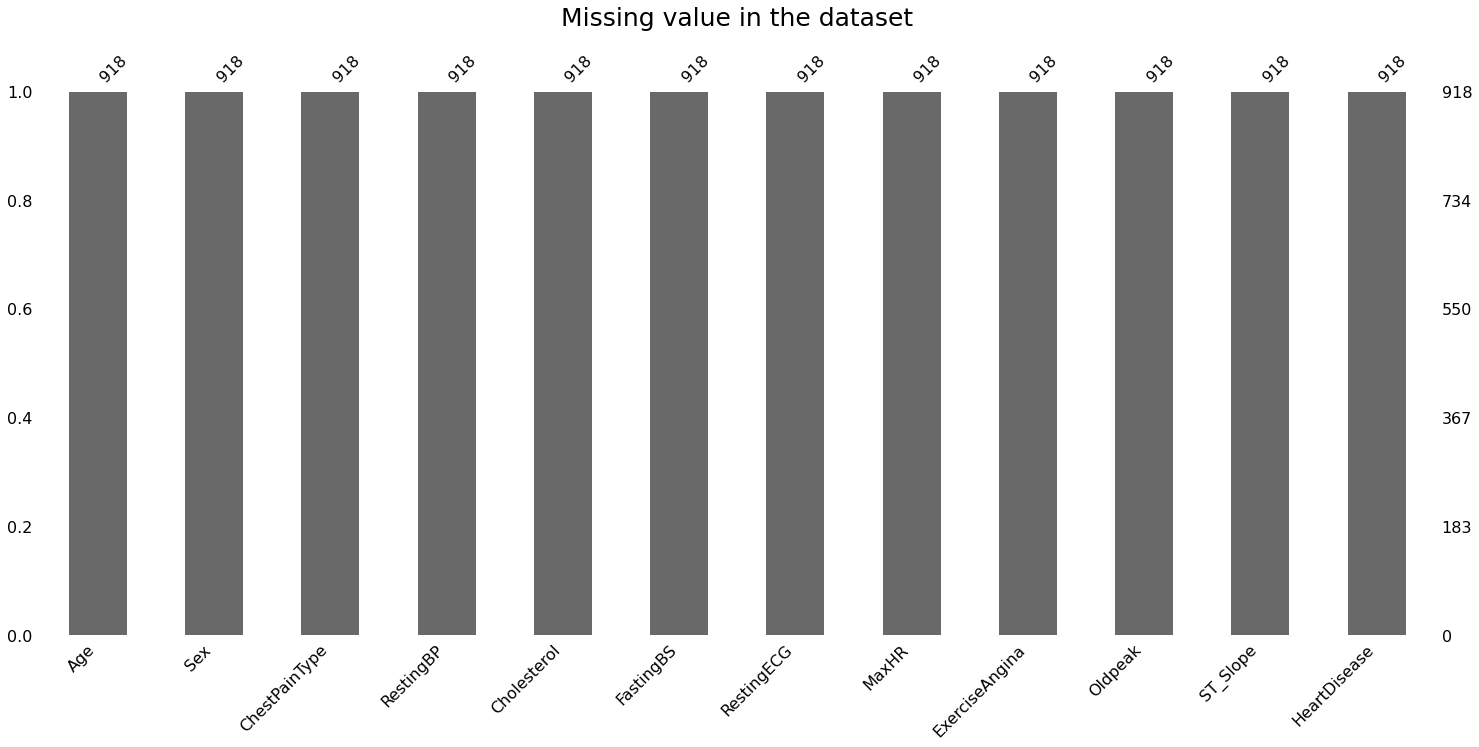

In [ ]:
msn.bar(df).set_title('Missing value in the dataset', size=25, y=1.11)

In [ ]:
# counts unique values in df
for col in df.select_dtypes('object').columns:
    print(col, '- # unique values:', df[col].nunique())

Sex - # unique values: 2
ChestPainType - # unique values: 4
RestingECG - # unique values: 3
ExerciseAngina - # unique values: 2
ST_Slope - # unique values: 3


In [ ]:
df.shape

(918, 12)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


# EDA

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
cats = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
nums = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]

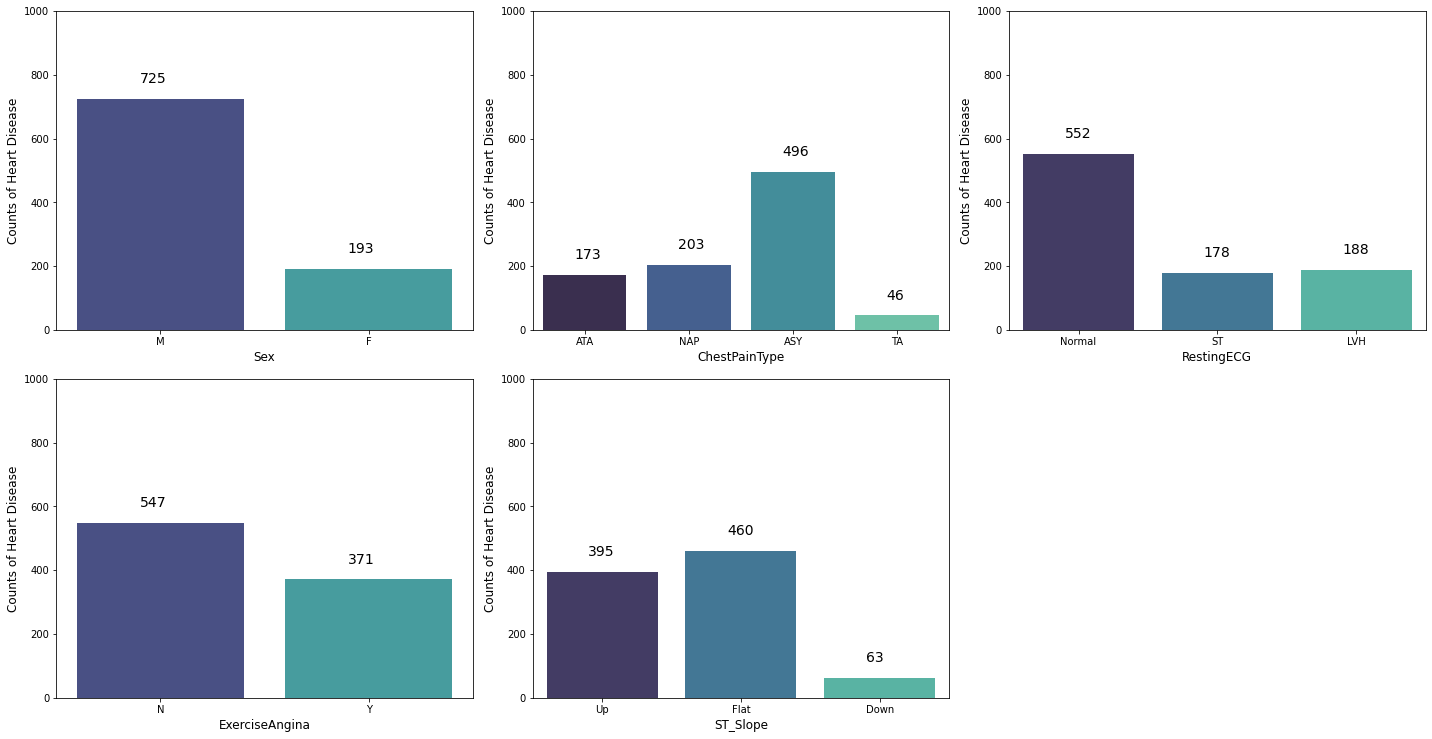

In [ ]:
plt.figure(figsize=(20,15))

for i, col in enumerate(cats):
    
    plt.subplot(3,3, i + 1)
    ax = sns.countplot(x=col, data=df,  palette="mako")
    
    plt.xlabel(col, fontsize= 12)
    plt.ylabel('Counts of Heart Disease', fontsize= 12)
    plt.ylim(0,1000)
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+50), fontsize = 14)
    
plt.tight_layout()    
    
plt.show()

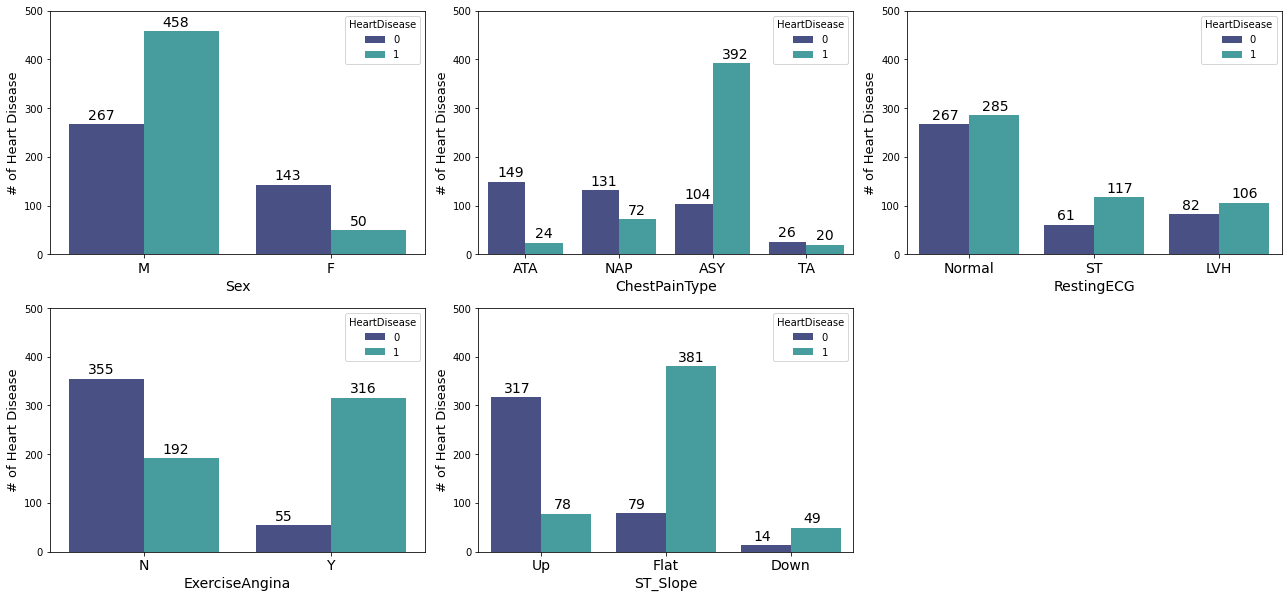

In [ ]:
plt.figure(figsize=(18,12))

for i,col in enumerate(cats):    
    plt.subplot(3,3,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="HeartDisease",  palette="mako")

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Heart Disease", fontsize= 13)
    plt.ylim(0,500)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10), fontsize= 14)

plt.tight_layout()

plt.show()

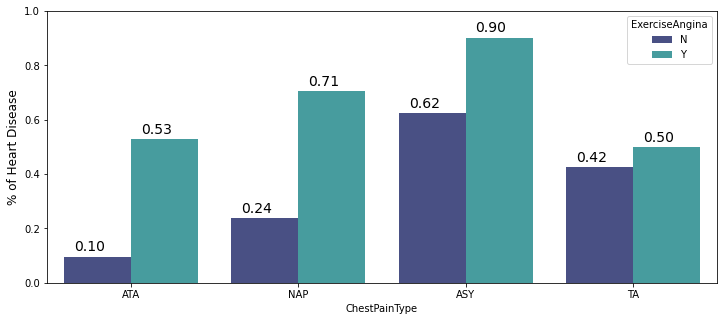

In [ ]:
plt.figure(figsize=(12,5))

ax = sns.barplot(x = "ChestPainType", y = "HeartDisease", hue = "ExerciseAngina", data = df, ci = None, palette="mako")

plt.ylabel("% of Heart Disease", fontsize= 12)
plt.ylim(0,1)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.020),fontsize=14)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

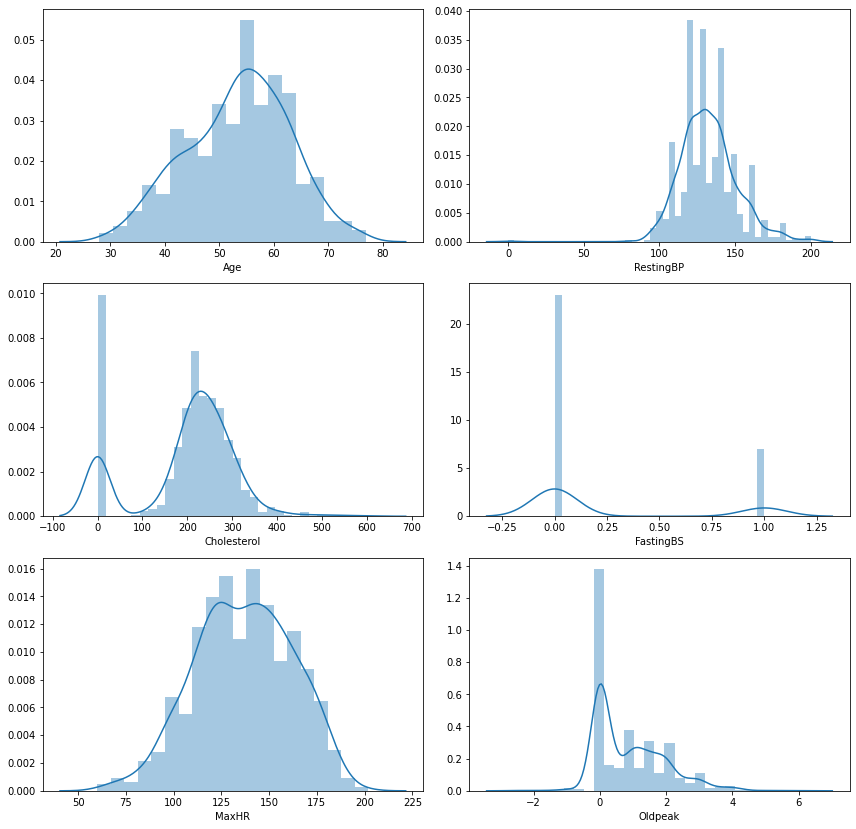

In [ ]:
plt.figure(figsize=(12,15))

for i,col in enumerate(nums):    
    plt.subplot(4,2,i + 1)
    sns.distplot(df.loc[:,col])
    plt.ylabel('')
    plt.tight_layout()

plt.show()

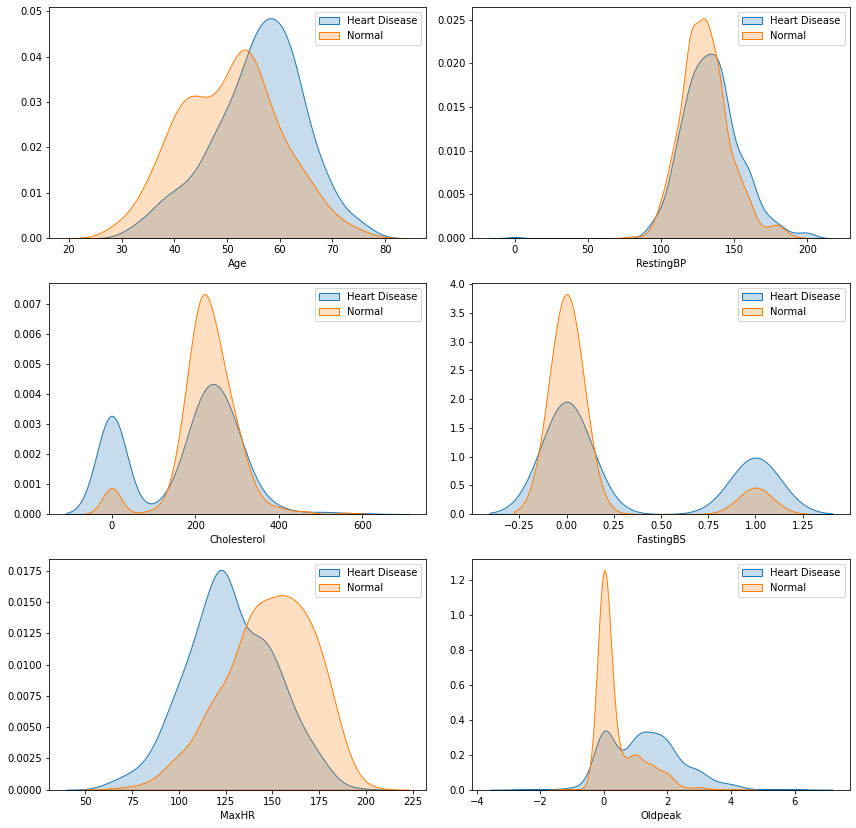

In [ ]:
plt.figure(figsize=(12,15))

for i,col in enumerate(nums):    
    plt.subplot(4,2,i + 1)    
    sns.kdeplot(df.loc[(df['HeartDisease'] == 1), col], label = 'Heart Disease', shade = True)
    sns.kdeplot(df.loc[(df['HeartDisease'] == 0), col], label = 'Normal', shade = True)
    plt.legend()
    plt.ylabel('')
    plt.tight_layout()

plt.show()

In [ ]:
df['age_bin'] = pd.cut(df['Age'],[20,40,60,80])
df['age_bin'].value_counts(sort = False)

(20, 40]     93
(40, 60]    604
(60, 80]    221
Name: age_bin, dtype: int64

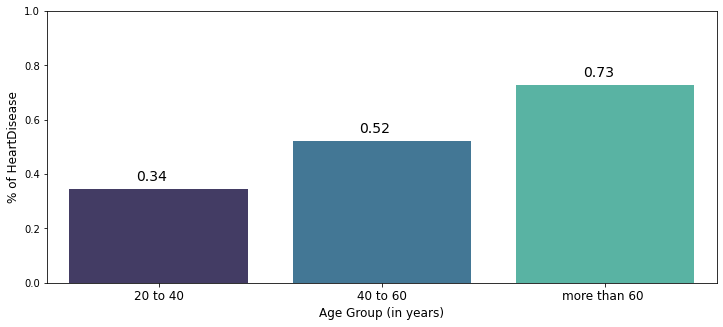

In [ ]:
plt.figure(figsize=(12,5))

ax = sns.barplot(x = "age_bin", y = "HeartDisease", data = df, ci = None, palette="mako")

plt.ylabel("% of HeartDisease", fontsize= 12)
plt.ylim(0,1)
plt.xticks([0,1,2], ['20 to 40', '40 to 60', 'more than 60 '], fontsize = 12)
plt.xlabel("Age Group (in years)", fontsize= 12)



for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.3, p.get_height()+0.03),fontsize=14)

plt.show()

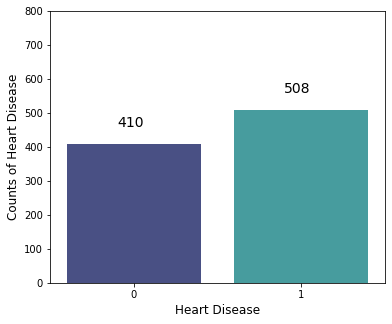

In [ ]:
plt.figure(figsize=(6,5))

ax = sns.countplot(x='HeartDisease', data=df, palette="mako")

plt.xlabel('Heart Disease', fontsize= 12)
plt.ylabel('Counts of Heart Disease', fontsize= 12)
plt.ylim(0,800)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+50), fontsize = 14)
    
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



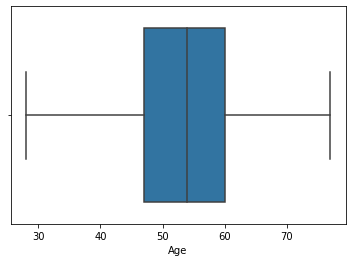

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



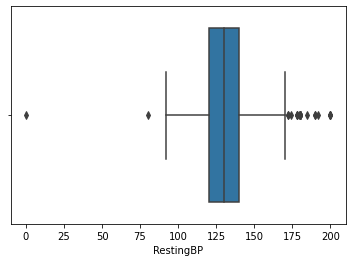

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



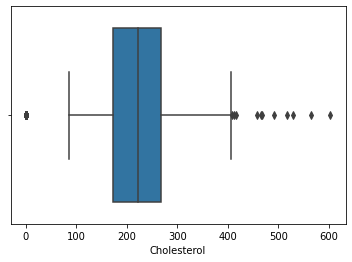

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



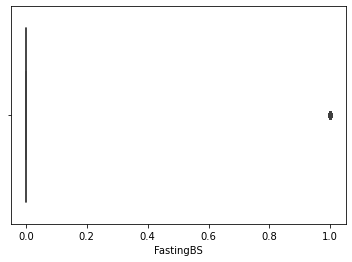

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



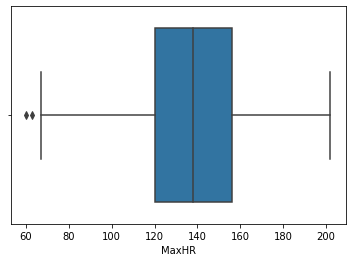

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



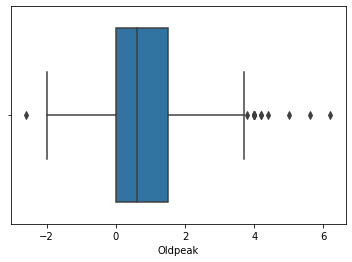

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



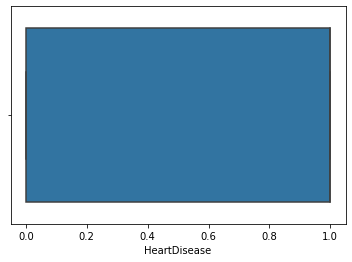

In [ ]:
for column in df.columns:
    if((df[column].dtype=='int64') | (df[column].dtype=='float64')):
        sns.boxplot(df[column])
        plt.show()

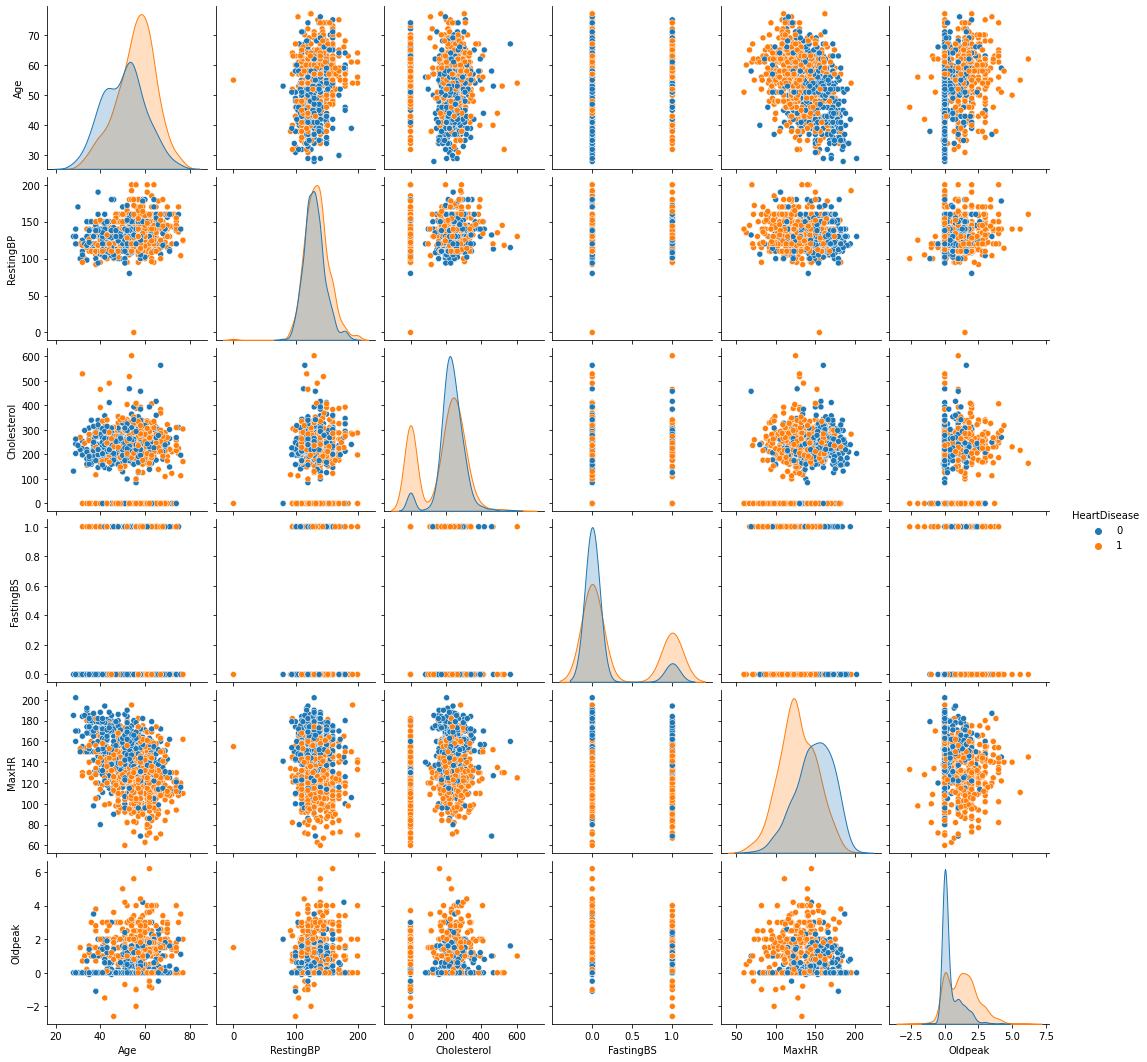

In [ ]:
sns.pairplot(df,hue='HeartDisease')

In [ ]:
df = df.drop(columns=['age_bin'])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
# differentiating numerical column from data to remove outliers
numerical_col=[]
for column in df.columns:
    if((df[column].dtype!='object') & (len(df[column].unique())>2)):
        numerical_col.append(column)

In [ ]:
numerical_col

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [ ]:
for column in numerical_col:
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    upper=Q3+ 1.5*IQR
    lower=Q1- 1.5*IQR
    df=df[(df[column]>lower) & (df[column]<upper)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



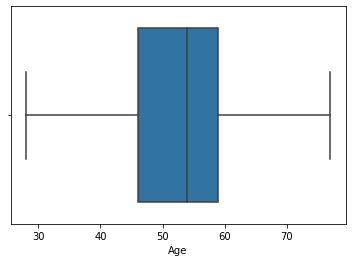

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



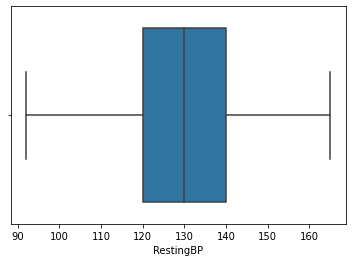

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



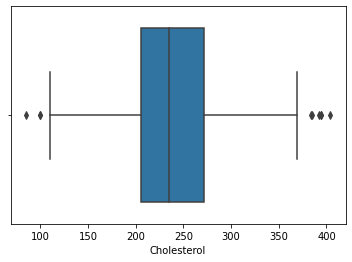

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



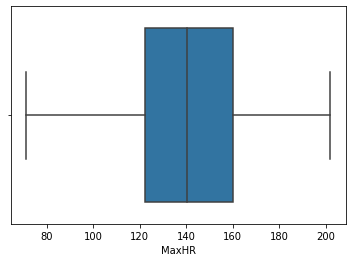

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



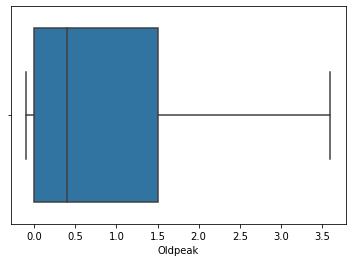

In [ ]:
for column in numerical_col:
    sns.boxplot(df[column])
    plt.show()

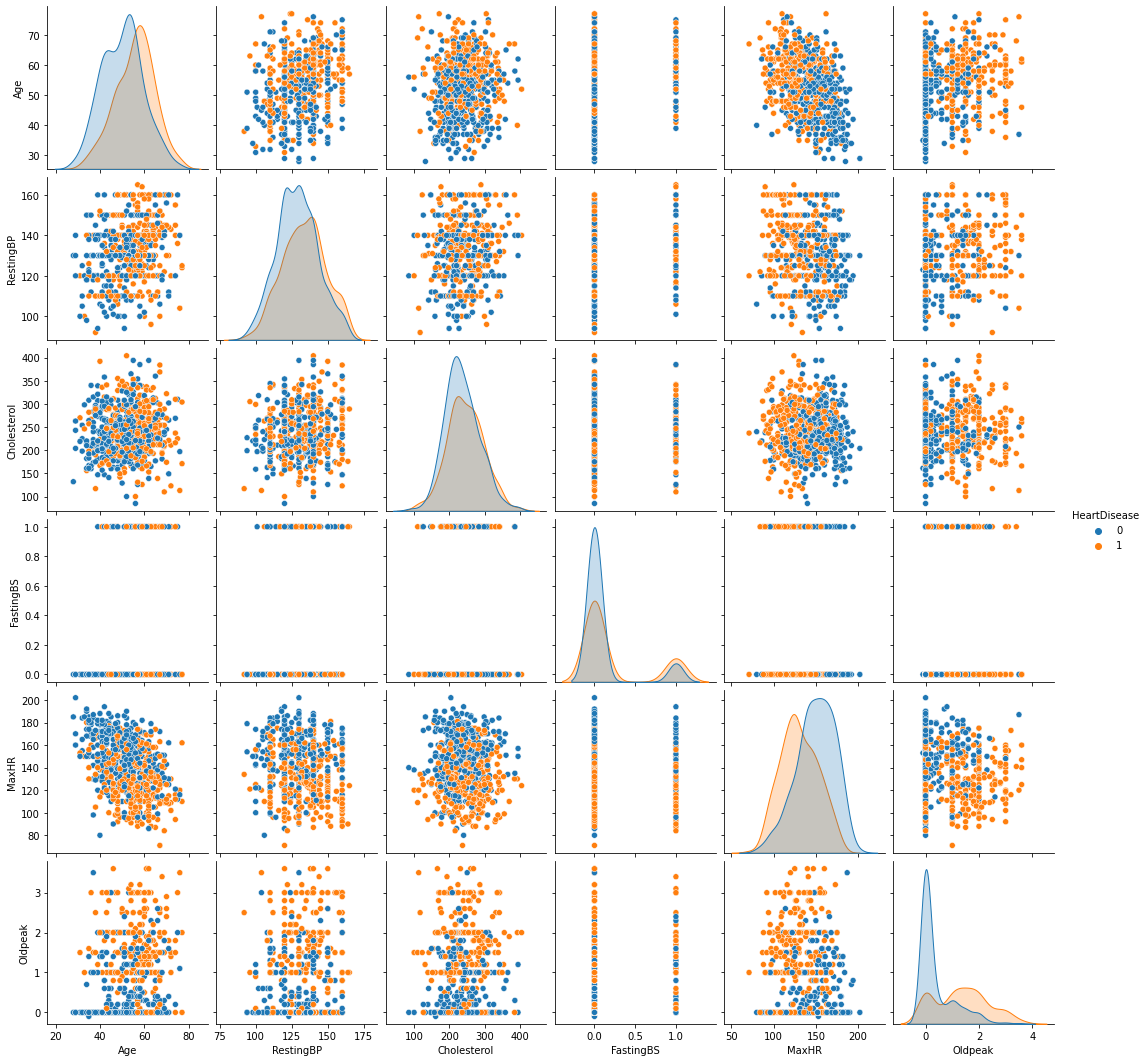

In [ ]:
sns.pairplot(df,hue='HeartDisease')

In [ ]:
labels = ['Heart disease', 'Normal']
values = df['HeartDisease'].value_counts()
colors = ['darkcyan', 'midnightblue']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+value',textfont_size=15,marker=dict(colors=colors))
fig.update_layout(annotations=[dict(text='HeartDisease', 
                                    x=0.50, y=0.5, font_size=13, 
                                    showarrow=False)])
fig.show()

In [ ]:
# counts unique values in df
for col in df.select_dtypes('object').columns:
    print(col, '- # unique values:', df[col].nunique())

Sex - # unique values: 2
ChestPainType - # unique values: 4
RestingECG - # unique values: 3
ExerciseAngina - # unique values: 2
ST_Slope - # unique values: 3


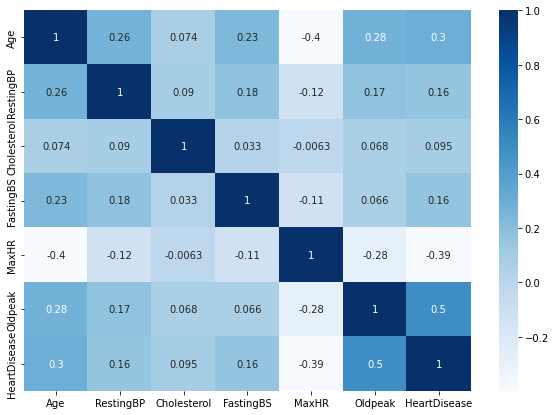

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True,cmap='Blues')
plt.show()

# Pre-Processing

In [ ]:
df_new = pd.get_dummies(df,columns=cats)
df_new.reset_index(drop=True, inplace=True)
df_new.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                690 non-null    int64  
 1   RestingBP          690 non-null    int64  
 2   Cholesterol        690 non-null    int64  
 3   FastingBS          690 non-null    int64  
 4   MaxHR              690 non-null    int64  
 5   Oldpeak            690 non-null    float64
 6   HeartDisease       690 non-null    int64  
 7   Sex_F              690 non-null    uint8  
 8   Sex_M              690 non-null    uint8  
 9   ChestPainType_ASY  690 non-null    uint8  
 10  ChestPainType_ATA  690 non-null    uint8  
 11  ChestPainType_NAP  690 non-null    uint8  
 12  ChestPainType_TA   690 non-null    uint8  
 13  RestingECG_LVH     690 non-null    uint8  
 14  RestingECG_Normal  690 non-null    uint8  
 15  RestingECG_ST      690 non-null    uint8  
 16  ExerciseAngina_N   690 non

# Split the Data

In [ ]:
# Split the data
from sklearn.model_selection import train_test_split
X = df_new.drop(columns='HeartDisease').to_numpy()
y = df_new[['HeartDisease']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print('Shape of training set ', X_train.shape)
print('Shape of test set ', X_test.shape)

Shape of training set  (552, 20)
Shape of test set  (138, 20)


In [ ]:
df_new['HeartDisease'].value_counts()

0    374
1    316
Name: HeartDisease, dtype: int64

# Modelling

## Random Forest

In [ ]:
#Define random forest classifier model
rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
%%time
#Hyperparameter tuning
parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

#Grid Search CV
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, 
                                     scoring='accuracy')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: user 7.4 s, sys: 62 ms, total: 7.46 s
Wall time: 7.44 s


In [ ]:
# results of Grid Search CV
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
13,"{'max_depth': 3, 'n_estimators': 40}",0.858673,1
12,"{'max_depth': 3, 'n_estimators': 30}",0.856871,2
15,"{'max_depth': 4, 'n_estimators': 10}",0.856871,2
21,"{'max_depth': 5, 'n_estimators': 20}",0.855070,4
9,"{'max_depth': 2, 'n_estimators': 50}",0.855070,4
16,"{'max_depth': 4, 'n_estimators': 20}",0.855070,4
14,"{'max_depth': 3, 'n_estimators': 50}",0.853268,7
11,"{'max_depth': 3, 'n_estimators': 20}",0.853251,8
18,"{'max_depth': 4, 'n_estimators': 40}",0.851417,9
17,"{'max_depth': 4, 'n_estimators': 30}",0.849648,10


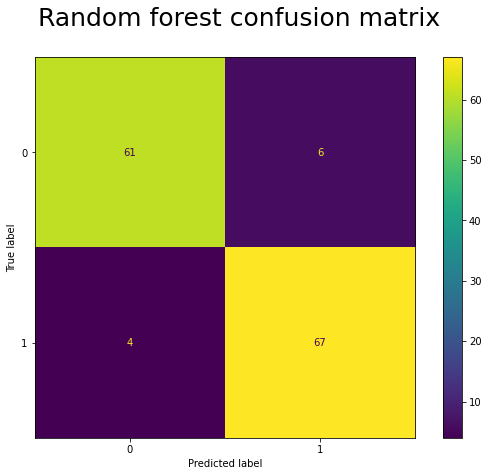

In [ ]:
#Create confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
y_test_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
y_train_pred = rf_clf_gridcv.best_estimator_.predict(X_train)

cm = confusion_matrix(y_test, y_test_pred, labels = rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax = ax)
fig.suptitle('Random forest confusion matrix', fontsize = 25)
plt.show()

In [ ]:
#Comparing actual train data and predicted train data on random forest model
print(f'Random forest model')
print(f'Actual train data')
print(y_train[:100])
print(f'Predicted train data')
print(y_train_pred[:100])

Random forest model
Actual train data
[0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1
 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
Predicted train data
[0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1
 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0]


In [ ]:
#Evaluate random forest model accuracy
accuracy_training = accuracy_score(y_train,y_train_pred)
accuracy_test = accuracy_score(y_test,y_test_pred)

print(f'Random forest model')
print(f'Accuracy Training Data: {accuracy_training}')
print(f'Accuracy Test Data: {accuracy_test}')

Random forest model
Accuracy Training Data: 0.8695652173913043
Accuracy Test Data: 0.927536231884058


In [ ]:
#Classification report on random forest model
print(f'Random Forest Model')
print(classification_report(y_test, y_test_pred))

Random Forest Model
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        67
           1       0.92      0.94      0.93        71

    accuracy                           0.93       138
   macro avg       0.93      0.93      0.93       138
weighted avg       0.93      0.93      0.93       138



## Decision Tree

In [ ]:
#Define Decision tree classifier model
dt_clf = DecisionTreeClassifier(random_state=42)

In [ ]:
%%time
#Hyperparameter tuning
param = {'max_depth':  [1,2,3,4,5], 'min_samples_split': [5, 10, 100, 300,500,1000]}

#Grid search CV
dt_clf_gridcv = GridSearchCV(dt_clf,param,cv=3,refit=True,return_train_score=True,scoring='accuracy')
dt_clf_gridcv.fit(X_train,y_train)

CPU times: user 235 ms, sys: 829 µs, total: 236 ms
Wall time: 239 ms


In [ ]:
#Results of GridSearchCV
cv_result = pd.DataFrame(dt_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
19,"{'max_depth': 4, 'min_samples_split': 10}",0.818841,1
12,"{'max_depth': 3, 'min_samples_split': 5}",0.818841,1
13,"{'max_depth': 3, 'min_samples_split': 10}",0.818841,1
18,"{'max_depth': 4, 'min_samples_split': 5}",0.818841,1
0,"{'max_depth': 1, 'min_samples_split': 5}",0.813406,5
1,"{'max_depth': 1, 'min_samples_split': 10}",0.813406,5
2,"{'max_depth': 1, 'min_samples_split': 100}",0.813406,5
3,"{'max_depth': 1, 'min_samples_split': 300}",0.813406,5
27,"{'max_depth': 5, 'min_samples_split': 300}",0.813406,5
21,"{'max_depth': 4, 'min_samples_split': 300}",0.813406,5


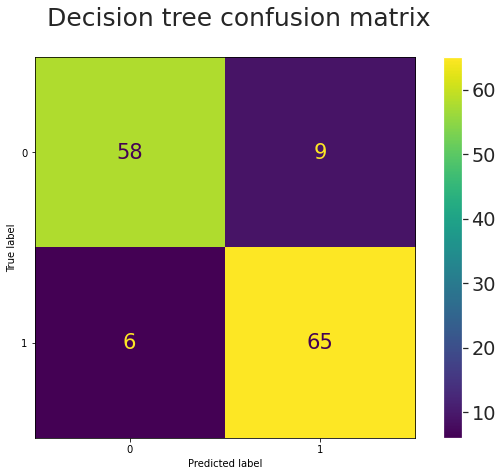

In [ ]:
#Create confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sns.set(font_scale = 1.75)

y_test_pred = dt_clf_gridcv.best_estimator_.predict(X_test)
y_train_pred = dt_clf_gridcv.best_estimator_.predict(X_train)

cm = confusion_matrix(y_test, y_test_pred, labels = dt_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = dt_clf_gridcv.best_estimator_.classes_)
disp.plot(ax = ax)
fig.suptitle('Decision tree confusion matrix', fontsize = 25)

plt.show()

In [ ]:
#Comparing actual train data and predicted train data on decision tree model
print('Actual train data')
print(y_train[:100])
print('Predicted train data')
print(y_train_pred[:100])

Actual train data
[0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1
 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
Predicted train data
[0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1
 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1
 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0]


In [ ]:
#Evaluate decision tree model accuracy
accuracy_training = accuracy_score(y_train,y_train_pred)
accuracy_test = accuracy_score(y_test,y_test_pred)

print(f'Decision tree model')
print(f'Accuracy Training Data: {accuracy_training}')
print(f'Accuracy Test Data: {accuracy_test}')

Decision tree model
Accuracy Training Data: 0.855072463768116
Accuracy Test Data: 0.8913043478260869


In [ ]:
#Classification report of previous model
print(f'Decision tree model')
print(classification_report(y_test, y_test_pred))

Decision tree model
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        67
           1       0.88      0.92      0.90        71

    accuracy                           0.89       138
   macro avg       0.89      0.89      0.89       138
weighted avg       0.89      0.89      0.89       138



## Gradient Booster

In [ ]:
# define gradient boosting classifier model
gb_clf = GradientBoostingClassifier(random_state=42)

In [ ]:
%%time
#Hyperparameter tuning
parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

#Grid Search CV
gb_clf_gridcv = GridSearchCV(gb_clf, parameters, cv=5, 
                                     scoring='accuracy')
gb_clf_gridcv.fit(X_train, y_train)

CPU times: user 6 s, sys: 19.4 ms, total: 6.02 s
Wall time: 6.14 s


In [ ]:
# results of Grid Search CV
cv_result = pd.DataFrame(gb_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
3,"{'max_depth': 1, 'n_estimators': 40}",0.849648,1
4,"{'max_depth': 1, 'n_estimators': 50}",0.849648,1
2,"{'max_depth': 1, 'n_estimators': 30}",0.849615,3
14,"{'max_depth': 3, 'n_estimators': 50}",0.847862,4
13,"{'max_depth': 3, 'n_estimators': 40}",0.846028,5
12,"{'max_depth': 3, 'n_estimators': 30}",0.842424,6
7,"{'max_depth': 2, 'n_estimators': 30}",0.840622,7
8,"{'max_depth': 2, 'n_estimators': 40}",0.838788,8
9,"{'max_depth': 2, 'n_estimators': 50}",0.836986,9
10,"{'max_depth': 3, 'n_estimators': 10}",0.836937,10


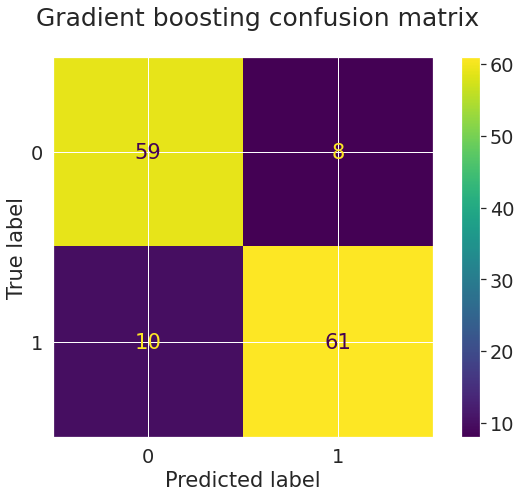

In [ ]:
#Create confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
y_test_pred = gb_clf_gridcv.best_estimator_.predict(X_test)
y_train_pred = gb_clf_gridcv.best_estimator_.predict(X_train)

cm = confusion_matrix(y_test, y_test_pred, labels = gb_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = gb_clf_gridcv.best_estimator_.classes_)
disp.plot(ax = ax)
fig.suptitle('Gradient boosting confusion matrix', fontsize = 25)
plt.show()

In [ ]:
#Comparing actual train data and predicted train data on gradient boosting model
print(f'Gradient boosting model')
print(f'Actual train data')
print(y_train[:100])
print(f'Predicted train data')
print(y_train_pred[:100])

Gradient boosting model
Actual train data
[0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1
 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
Predicted train data
[0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1
 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0]


In [ ]:
#Evaluate gradient boosting model accuracy
accuracy_training = accuracy_score(y_train,y_train_pred)
accuracy_test = accuracy_score(y_test,y_test_pred)

print(f'Gradient boosting model')
print(f'Accuracy Training Data: {accuracy_training}')
print(f'Accuracy Test Data: {accuracy_test}')

Gradient boosting model
Accuracy Training Data: 0.8568840579710145
Accuracy Test Data: 0.8695652173913043


In [ ]:
# classification report
print(f'Gradient boosting model')
print(classification_report(y_test, y_test_pred))

Gradient boosting model
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        67
           1       0.88      0.86      0.87        71

    accuracy                           0.87       138
   macro avg       0.87      0.87      0.87       138
weighted avg       0.87      0.87      0.87       138



# Insight






1.   Based on the data, 54.2% of patient with heart disease

2.   Patients with age over 60 years old have the highest percentage of heart disease, followed by the age range 40 to 60 years old

1.   90% of patients have Asymptomatic Heart Disease

# Conclusion

1.   This model uses tree-based algorithms to predict heart disease 

2.   Random forest has the highest f1-score 93%

1.   Gradient booster processes the model for 6.14 seconds fastest compared to other models 





# Recommendation

1.   Health institutions provide counseling about heart disease, especially to the elderly

2.   Need regular medical check-up to the elderly to prevent heart disease

